Einleitung ...
Musikstreaming, Milliardenmarkt, kulturelle Bedeutung ...

## 1 Importierung benötigter Bibliotheken und des Datensatzes
In diesem Kapitel wird XY gemacht.

### 1.1 Laden der Bibliotheken
Innerhalb des Datenexplorationsprojektes werden die Bibliotheken XY benötigt.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from matplotlib import pyplot as plt

### 1.2 Laden des Basis-Datensatzes

In [2]:
base_data = pd.read_csv("song_data.csv")
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


Der Basisdatensatz besteht aus 18.834 Einträgen ...

In [3]:
base_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


### 1.3 Erweiterung des Datensatzes
Zur Erweiterung des Basis-Datensatzes wird die Spotify Web API (https://developer.spotify.com/documentation/web-api/) verwendet. Dazu werden eine Client-ID und ein Client-Secret benötigt, die im Rahmen von ... erstellt werden können. 

In [50]:
CLIENT_ID = "28f2619d8a6242ceae8160c565174771"
CLIENT_SECRET = "5f6cb53e2614428380966f0e93e72c16"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

results = sp.search(q="Boulevard of Broken Dreams", limit=50, type="track")

for idx, track in enumerate(results["tracks"]["items"]):
    if track["duration_ms"] == 262333:
        print(idx, track)

0 {'album': {'album_type': 'compilation', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7oPftvlwr6VrsViSDV7fJY'}, 'href': 'https://api.spotify.com/v1/artists/7oPftvlwr6VrsViSDV7fJY', 'id': '7oPftvlwr6VrsViSDV7fJY', 'name': 'Green Day', 'type': 'artist', 'uri': 'spotify:artist:7oPftvlwr6VrsViSDV7fJY'}], 'available_markets': ['AD', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BG', 'BI', 'BJ', 'BO', 'BR', 'BS', 'BT', 'BW', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MN', 'MO', 'MR', 'MT', 'MU', 'MV', 'MW

## 2 Übersicht und Interpretation der Datenwerte


In [8]:
base_data.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

In [32]:
base_data.sort_values(by=["song_popularity"]).tail(20)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7660,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.0,2,0.259,-8.304,1,0.3300,104.053,4,0.329
14314,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.0,2,0.259,-8.304,1,0.3300,104.053,4,0.329
7465,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.0,2,0.259,-8.304,1,0.3300,104.053,4,0.329
5608,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.0,2,0.259,-8.304,1,0.3300,104.053,4,0.329
3443,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.0,2,0.259,-8.304,1,0.3300,104.053,4,0.329
11777,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.0,2,0.259,-8.304,1,0.3300,104.053,4,0.329
17603,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.0,2,0.259,-8.304,1,0.3300,104.053,4,0.329
7574,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.0,2,0.259,-8.304,1,0.3300,104.053,4,0.329
17392,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17638,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671


- song_name = Name des Liedes (String)
- song_popularity = Beliebtheit des Liedes in % (int 0-100) --> WAS WIRD IN PROZENT ANGEGEBEN (STREAMS?`)????? The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
- song_duration = Länge des Liedes in ms (int 12s-30min)
- acousticness = Akustik eines Liedes in % (float 0-1) Wert von 1.0 bedeutet, dass es ein akustisches Lied ist (nicht elektronisch verstärkt)
- danceability = Tanzbarkeit in % (float 0-1) Wert von 1.0 bedeutet, dass das Lied sehr um Tanzen anregt, basierend auf musikalische Elemente wie unteranderem Tempo, Stabilität des Rhytmik, Stärke des Bass' und weiteren.
- energy = Intensität und Aktivität des Liedes in % (float 0-1), basierend auf der Schnelligkeit, Lautstärke und Rauschen des Liedes sowie der generellen Entropie. Wert von 1.0 bedeutet, dass ein Lied sehr energetisch ist, beispielsweise Death Metal
- instrumentalness = Instrumentalität in % (float 0-1), gibt an in wie weit Vocals im Lied vorhanden sind. Je näher an 1.0, desto wahrscheinlicher Lied ohne Vocals, ab 0.5 kann davon ausgegangen werden, dass Lied instrumental ist
- key = Tonart in dem Lied (int -1-11), -1 wenn keine primäre Tonart erkannt wurde (https://de.wikipedia.org/wiki/Tonklasse)
- liveness = Wahrscheinlichkeit, dass das Lied eine Liveversion ist (float 0-1), basierend auf Zuschauer/Zuhörer die im Hintegrund entdeckt werden, ab 0.8 kann davon ausgegangen werden, dass es eine Liveversion ist
- loudness = gibt die durchschnittliche Lautstärke des Liedes in Decibel an (float -38.0 - 1.5), Lautstärke ist relativ angegeben
- audio_mode = Modalität der Tonleiter (int 0=Moll oder 1=Dur) 
- speechiness = Exklusiv gesprochen, zum Beispiel Reden oder Gedichte (Racism And Injustice von Martin L. King), alles >0.66 sehr wahrscheinlich, dass nur Gesprochen wird, alles <0.33 wenig/kein gesprochenes Wort
- tempo = Schätzung zur Geschwindigkeit des Liedes in Beats per Minute (BPM) (float)
- time_signature = Taktangabe (int 3-7), gibt Takt von 3/4 Takt bis 7/4 Takt an
- audio_valence = Positivität des Liedes (float 0-1), Eine hohe Wertigkeit deutet auf positive Stimmung hin (fröhlich, euphorisch), ein niedriger Wert von einer negativen (aggresiv, melancholisch)

Quelle: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

### 2.1 Umgang mit fehlenden Werten oder Inkonsistenzen

In [43]:
cleared = base_data.drop_duplicates(subset = ["song_name", "song_duration_ms"], keep = "last").reset_index(drop = True)
cleared.info()
cleared.sort_values(by=["song_popularity"]).tail(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14468 entries, 0 to 14467
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14468 non-null  object 
 1   song_popularity   14468 non-null  int64  
 2   song_duration_ms  14468 non-null  int64  
 3   acousticness      14468 non-null  float64
 4   danceability      14468 non-null  float64
 5   energy            14468 non-null  float64
 6   instrumentalness  14468 non-null  float64
 7   key               14468 non-null  int64  
 8   liveness          14468 non-null  float64
 9   loudness          14468 non-null  float64
 10  audio_mode        14468 non-null  int64  
 11  speechiness       14468 non-null  float64
 12  tempo             14468 non-null  float64
 13  time_signature    14468 non-null  int64  
 14  audio_valence     14468 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.7+ MB


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
13144,Natural,95,189466,0.21600,0.448,0.612,0.000000,2,0.0800,-6.106,1,0.0708,97.773,4,0.213
13517,I Like It,95,253390,0.09900,0.816,0.726,0.000000,5,0.3720,-3.998,0,0.1290,136.048,4,0.650
13500,BEBE,95,217822,0.17200,0.635,0.902,0.000000,0,0.1250,-3.559,1,0.1090,102.063,4,0.286
13298,Better Now,95,231266,0.35400,0.680,0.563,0.000000,10,0.1360,-5.843,1,0.0454,145.028,4,0.374
14123,Taste (feat. Offset),95,232959,0.02360,0.884,0.559,0.000000,0,0.1010,-7.442,1,0.1200,97.994,4,0.342
13476,Be Alright,96,196373,0.69700,0.553,0.586,0.000000,11,0.0813,-6.319,1,0.0362,126.684,4,0.443
13480,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.08800,0.931,0.387,0.000000,1,0.1360,-9.127,1,0.4120,125.978,4,0.376
13296,SAD!,96,166605,0.25800,0.740,0.613,0.003720,8,0.1230,-4.880,1,0.1450,75.023,4,0.473
13294,Moonlight,96,135090,0.55600,0.921,0.537,0.004040,9,0.1020,-5.723,0,0.0804,128.009,4,0.711
10609,Lucky You (feat. Joyner Lucas),96,244679,0.06270,0.876,0.786,0.000000,10,0.1270,-4.884,0,0.3060,153.068,4,0.575


Redundanzen sind vorhanden, diese werden entfernt anhand gleichem Songtitel und gleicher Songlänge

## 3 Visualisierung und Korrelationen zwischen den Features


- Clustern nach Künstler, haben wenige Künstler viel Popularität oder eher One-Hit-Wunder?
- NLP vom Songtitel ?
- Genre in Bezug zum Zeitraum

<AxesSubplot:>

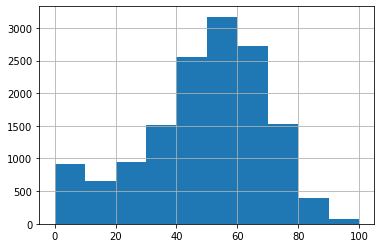

In [36]:
cleared["song_popularity"].hist()

<AxesSubplot:>

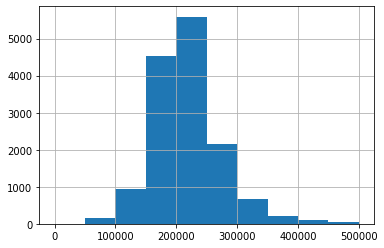

In [38]:
cleared["song_duration_ms"].hist(range=[0, 500000])

<AxesSubplot:>

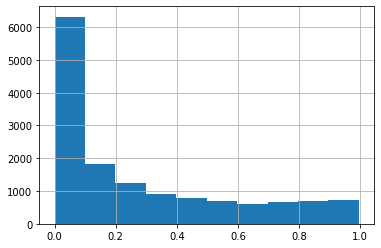

In [39]:
cleared["acousticness"].hist()

<AxesSubplot:>

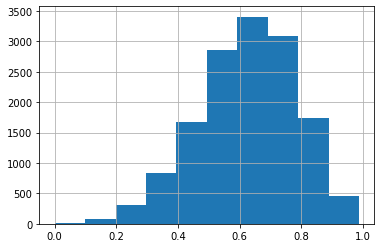

In [40]:
cleared["danceability"].hist()

<AxesSubplot:>

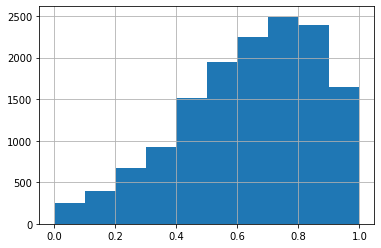

In [41]:
cleared["energy"].hist()

<AxesSubplot:>

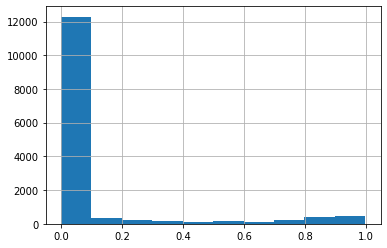

In [42]:
cleared["instrumentalness"].hist()

<AxesSubplot:>

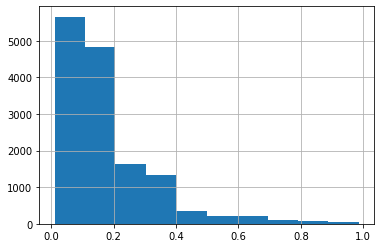

In [44]:
cleared["liveness"].hist()

<AxesSubplot:>

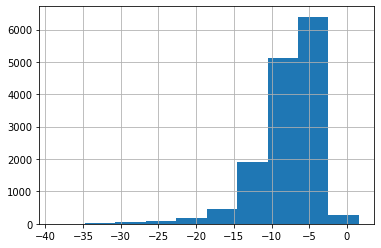

In [45]:
cleared["loudness"].hist()

<AxesSubplot:>

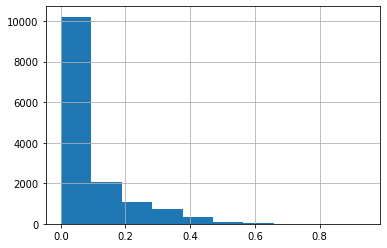

In [47]:
cleared["speechiness"].hist()

<AxesSubplot:>

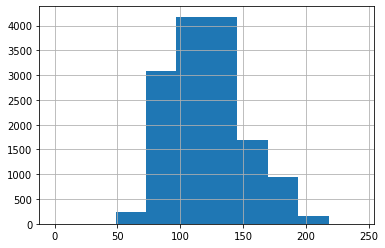

In [48]:
cleared["tempo"].hist()

<AxesSubplot:>

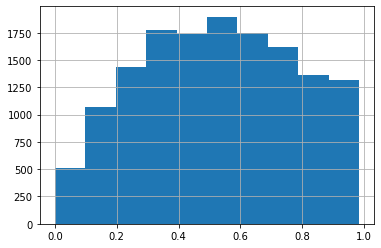

In [49]:
cleared["audio_valence"].hist()

In [12]:
# Instrumentalness mit accousticness
matrix1 = cleared.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(matrix1, annot=True)
plt.show()

## 4 Datentransformation

## 5 Maschinelles Lernen

## 6 Diskussion

### 6.1 Konklusion

## Quellenverzeichnis
